 **Лабораторная работа 7**
 
 Сравнение скорости сходимости метода
Якоби и Зейделя

> Цель работы

Убедиться в эффективности метода Зейделя на экспериментальных данных и
подтвердить утверждение о том, что метод Зейделя сходится примерно в два раза быстрее метода Якоби.



> Задание

* Реализовать метод Якоби и Зейделя.
* Для различных размеров N матрицы A генерировать матрицы с постоянной степенью
диагонального преобладания, далее решить систему уравнений Ax=b двумя методами и
получить количество итераций, необходимых для получения решения с заданной
фиксированной точностью e.
* Степень диагонального преобладания определяется как максимальное значение
отношение модуля диагонального элемента к сумме модулей внедиагональных элементов.
* Построить графики зависимости скорости решения Ax=b двумя способами от размера
матрицы А на одной координатной плоскости.
* Размер N матрицы A необходимо брать в диапазоне от 3 до порядка 100.

3	 --- 	Jacobi: 2		Seidel:2
4	 --- 	Jacobi: 2		Seidel:2
5	 --- 	Jacobi: 3		Seidel:2
6	 --- 	Jacobi: 3		Seidel:2
7	 --- 	Jacobi: 3		Seidel:3
8	 --- 	Jacobi: 2		Seidel:2
9	 --- 	Jacobi: 3		Seidel:3
10	 --- 	Jacobi: 3		Seidel:2
11	 --- 	Jacobi: 3		Seidel:3
12	 --- 	Jacobi: 3		Seidel:3
13	 --- 	Jacobi: 3		Seidel:3
14	 --- 	Jacobi: 3		Seidel:3
15	 --- 	Jacobi: 3		Seidel:3
16	 --- 	Jacobi: 3		Seidel:3
17	 --- 	Jacobi: 4		Seidel:3
18	 --- 	Jacobi: 3		Seidel:3
19	 --- 	Jacobi: 3		Seidel:3
20	 --- 	Jacobi: 4		Seidel:3
21	 --- 	Jacobi: 4		Seidel:3
22	 --- 	Jacobi: 4		Seidel:3
23	 --- 	Jacobi: 4		Seidel:3
24	 --- 	Jacobi: 4		Seidel:3
25	 --- 	Jacobi: 4		Seidel:3
26	 --- 	Jacobi: 4		Seidel:4
27	 --- 	Jacobi: 4		Seidel:3
28	 --- 	Jacobi: 4		Seidel:3
29	 --- 	Jacobi: 4		Seidel:3
30	 --- 	Jacobi: 4		Seidel:3
31	 --- 	Jacobi: 4		Seidel:3
32	 --- 	Jacobi: 4		Seidel:4
33	 --- 	Jacobi: 4		Seidel:4
34	 --- 	Jacobi: 5		Seidel:4
35	 --- 	Jacobi: 4		Seidel:4
36	 --- 	Jacobi: 4		Seidel:4
37	 --- 	Jacobi: 4		S

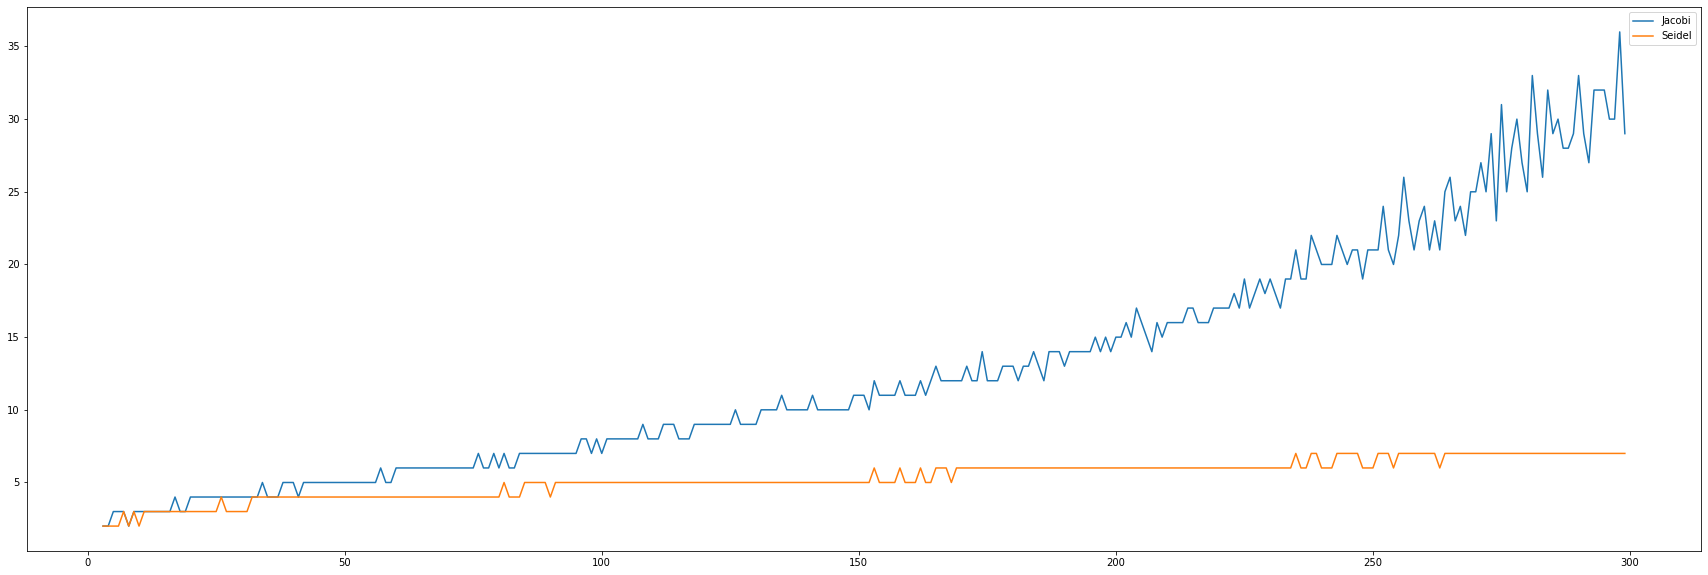

In [ ]:
import numpy
import random
import matplotlib.pyplot as plt


def get_random_float(a, b):
    return random.random() * (b - a) + a


def generate_matrix(n, a, b, p):
    res = []
    for i in range(n):
        res_cnt = []
        for j in range(n):
            f = get_random_float(a, b)
            if i == j:
                res_cnt.append(p * f)
            else:
                res_cnt.append(f)
        res.append(res_cnt)
    return numpy.array(res)


def generate_vector(n, a, b):
    res = []
    for i in range(n):
        res.append(get_random_float(a, b))
    return numpy.array(res)


def get_Jacobi(A, f, need_delta):
    D = numpy.diag(numpy.diag(A))
    D_inv = numpy.linalg.inv(D)
    P = numpy.dot(-D_inv, A - D)
    g = numpy.dot(D_inv, f)

    x_k_1 = g
    cnt = 0
    flag = True
    while flag:
        cnt += 1
        x_k = numpy.dot(P, x_k_1) + g
        if numpy.linalg.norm(x_k - x_k_1) < need_delta:
            flag = False
        x_k_1 = x_k
    return cnt


def get_Seidel(A, f, need_delta):
    D = numpy.diag(numpy.diag(A))
    A_bot = numpy.tril(A)
    A_top = A - A_bot

    P = -numpy.linalg.inv((A_top + D)) * A_bot

    x_k_1 = numpy.dot(numpy.linalg.inv(D), f)

    cnt = 0
    flag = True

    while flag:
        cnt += 1
        x_k = numpy.dot(numpy.linalg.inv(A_bot), f - numpy.dot(A_top, x_k_1))
        if numpy.linalg.norm(x_k - x_k_1) < need_delta:
            flag = False
        x_k_1 = x_k
    return cnt


def get_absolute(A, f):
    return numpy.dot(numpy.linalg.inv(A), numpy.array(f))


def print_matrix(matr):
    print('-------------------')
    for row in matr:
        print(row)

    print('-------------------')


def operate_once(count):
    A = generate_matrix(count, 1, 5, 500)
    f = generate_vector(count, 1, 5)
    need_delta = pow(10, -6)

    a = get_Jacobi(A, f, need_delta)
    b = get_Seidel(A, f, need_delta)

    return a, b


def main():
    x = []
    j = []
    s = []
    for i in range(3, 300):
        j1, s1 = operate_once(count=i)
        x.append(i)
        j.append(j1)
        s.append(s1)

    sum = 0
    for i in range(len(x)):
        sum += j[i] / s[i]
        print('{}\t --- \tJacobi: {}\t\tSeidel:{}'.format(x[i], j[i], s[i]))


    plt.figure(figsize=(30, 10))
    plt.plot(x, j)
    plt.plot(x, s)
    plt.legend(['Jacobi', 'Seidel'])
    print('Average impact: {}'.format(float(sum) / float(len(x))))

if __name__ == "__main__":
    main()

Как можно видеть, в результате метод Зейделя имеет более высокую производительность (примерно в два раза меньшее количество нужных итераций для достижения поставленной погрешности) в матрицах с диагональным преобладанием, чем метод Якоби 